#  Codificación de Variables Categóricas


In [40]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Ejemplo de codificacion
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')  # Asegúrate de cargar tus datos correctamente

data = data.drop(columns=['Height', 'Weight'])

# Codificación de variables categóricas
data = pd.get_dummies(data, columns=['Gender','CAEC', 'CALC', 'MTRANS'], drop_first=True)

# Mapear las binarias manualmente
data['family_history_with_overweight'] = data['family_history_with_overweight'].map({'yes': 1, 'no': 0})
data['FAVC'] = data['FAVC'].map({'yes': 1, 'no': 0})
data['SMOKE'] = data['SMOKE'].map({'yes': 1, 'no': 0})
data['SCC'] = data['SCC'].map({'yes': 1, 'no': 0})


# Arbol de decision

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Definir X y y
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']


# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el árbol de decisión
modelo_arbol = DecisionTreeClassifier(max_depth=5, random_state=42)
modelo_arbol.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [42]:
# Hacer predicciones
y_pred = modelo_arbol.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del test: {accuracy:.2f}')
# Calcular la exactitud
y_pred2 = modelo_arbol.predict(X_train)
accuracy = accuracy_score(y_train, y_pred2)
print(f'Accuracy del train: {accuracy:.2f}')

Accuracy del test: 0.63
Accuracy del train: 0.66


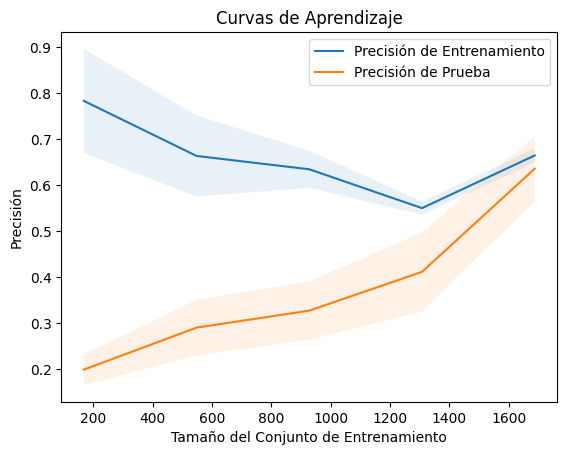

In [44]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Obtener las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    modelo_arbol, X, y, cv=5, n_jobs=-1, scoring='accuracy'
)

# Calcular el promedio y la desviación estándar de los puntajes
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Graficar las curvas de aprendizaje
plt.figure()
plt.plot(train_sizes, train_mean, label='Precisión de Entrenamiento')
plt.plot(train_sizes, test_mean, label='Precisión de Prueba')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Precisión')
plt.title('Curvas de Aprendizaje')
plt.legend()
plt.show()


In [45]:
# Evaluar el modelo en el training
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.84      0.57      0.68        56
      Normal_Weight       0.49      0.61      0.55        62
     Obesity_Type_I       0.49      0.78      0.60        78
    Obesity_Type_II       0.74      0.78      0.76        58
   Obesity_Type_III       0.93      1.00      0.96        63
 Overweight_Level_I       0.54      0.36      0.43        56
Overweight_Level_II       0.50      0.18      0.26        50

           accuracy                           0.63       423
          macro avg       0.65      0.61      0.61       423
       weighted avg       0.64      0.63      0.62       423



## Busqueda de mejores hiperparametros

In [46]:
"""
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Dividir el dataset en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo de DecisionTreeClassifier
modelo_arboles = DecisionTreeClassifier()

# Definir el grid de hiperparámetros que se van a probar
param_grid = {
    'criterion': ['gini', 'entropy'],  # Métrica de impureza
    'max_depth': [3, 5, 10, None],     # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],   # Muestras mínimas para dividir un nodo
    'min_samples_leaf': [1, 2, 5],     # Muestras mínimas en un nodo hoja
    'max_features': [None, 'sqrt', 'log2']  # Número de características a considerar en cada división
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=modelo_arboles, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(x_train, y_train)

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)

# Hacer predicciones con el modelo usando los mejores hiperparámetros
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo con mejores hiperparámetros:", accuracy)
"""

'\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.model_selection import GridSearchCV, train_test_split\nfrom sklearn.metrics import accuracy_score\n\n# Dividir el dataset en conjuntos de entrenamiento y prueba\nx_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Definir el modelo de DecisionTreeClassifier\nmodelo_arboles = DecisionTreeClassifier()\n\n# Definir el grid de hiperparámetros que se van a probar\nparam_grid = {\n    \'criterion\': [\'gini\', \'entropy\'],  # Métrica de impureza\n    \'max_depth\': [3, 5, 10, None],     # Profundidad máxima del árbol\n    \'min_samples_split\': [2, 5, 10],   # Muestras mínimas para dividir un nodo\n    \'min_samples_leaf\': [1, 2, 5],     # Muestras mínimas en un nodo hoja\n    \'max_features\': [None, \'sqrt\', \'log2\']  # Número de características a considerar en cada división\n}\n\n# Crear el objeto GridSearchCV\ngrid_search = GridSearchCV(estimator=modelo_arboles, param_grid=para

In [47]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear el modelo de árbol de decisión con los mejores hiperparámetros
modelo_arboles = DecisionTreeClassifier(
    criterion='gini',         # Criterio: índice de Gini
    max_depth=None,           # Sin límite en la profundidad del árbol
    max_features=None,        # Considera todas las características en cada división
    min_samples_leaf=1,       # Mínimo de 1 muestra en cada nodo hoja
    min_samples_split=5       # Mínimo de 5 muestras para dividir un nodo
)

# Ajustar el modelo a los datos de entrenamiento
modelo_arboles.fit(x_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = modelo_arboles.predict(x_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo en prueba: {accuracy}")
# Evaluar el modelo
# Hacer predicciones sobre el conjunto de prueba
y_pred2 = modelo_arboles.predict(x_train)
accuracy = accuracy_score(y_train, y_pred2)
print(f"Exactitud del modelo en entrenamiento: {accuracy}")

Exactitud del modelo en prueba: 0.7446808510638298
Exactitud del modelo en entrenamiento: 0.9490521327014217


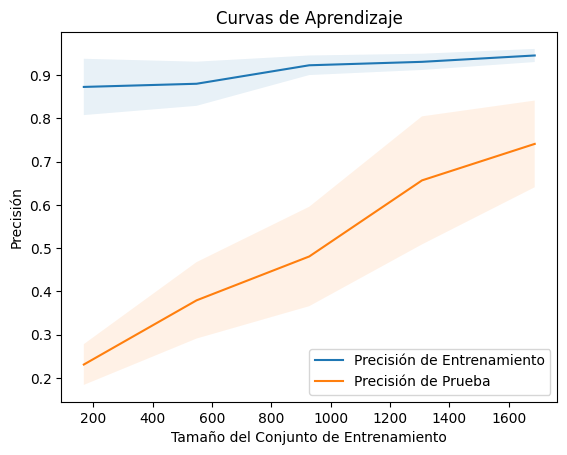

In [48]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report

# Obtener las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    modelo_arboles, X, y, cv=5, n_jobs=-1, scoring='accuracy'
)

# Calcular el promedio y la desviación estándar de los puntajes
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Graficar las curvas de aprendizaje
plt.figure()
plt.plot(train_sizes, train_mean, label='Precisión de Entrenamiento')
plt.plot(train_sizes, test_mean, label='Precisión de Prueba')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Precisión')
plt.title('Curvas de Aprendizaje')
plt.legend()
plt.show()


In [49]:
# Evaluar el modelo en el training
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.80      0.82      0.81        65
      Normal_Weight       0.53      0.67      0.59        57
     Obesity_Type_I       0.68      0.75      0.71        67
    Obesity_Type_II       0.82      0.85      0.83        53
   Obesity_Type_III       0.99      1.00      0.99        69
 Overweight_Level_I       0.67      0.54      0.60        57
Overweight_Level_II       0.71      0.53      0.60        55

           accuracy                           0.74       423
          macro avg       0.74      0.74      0.73       423
       weighted avg       0.75      0.74      0.74       423



# Visualización e Interpretación del Árbol de Decisión

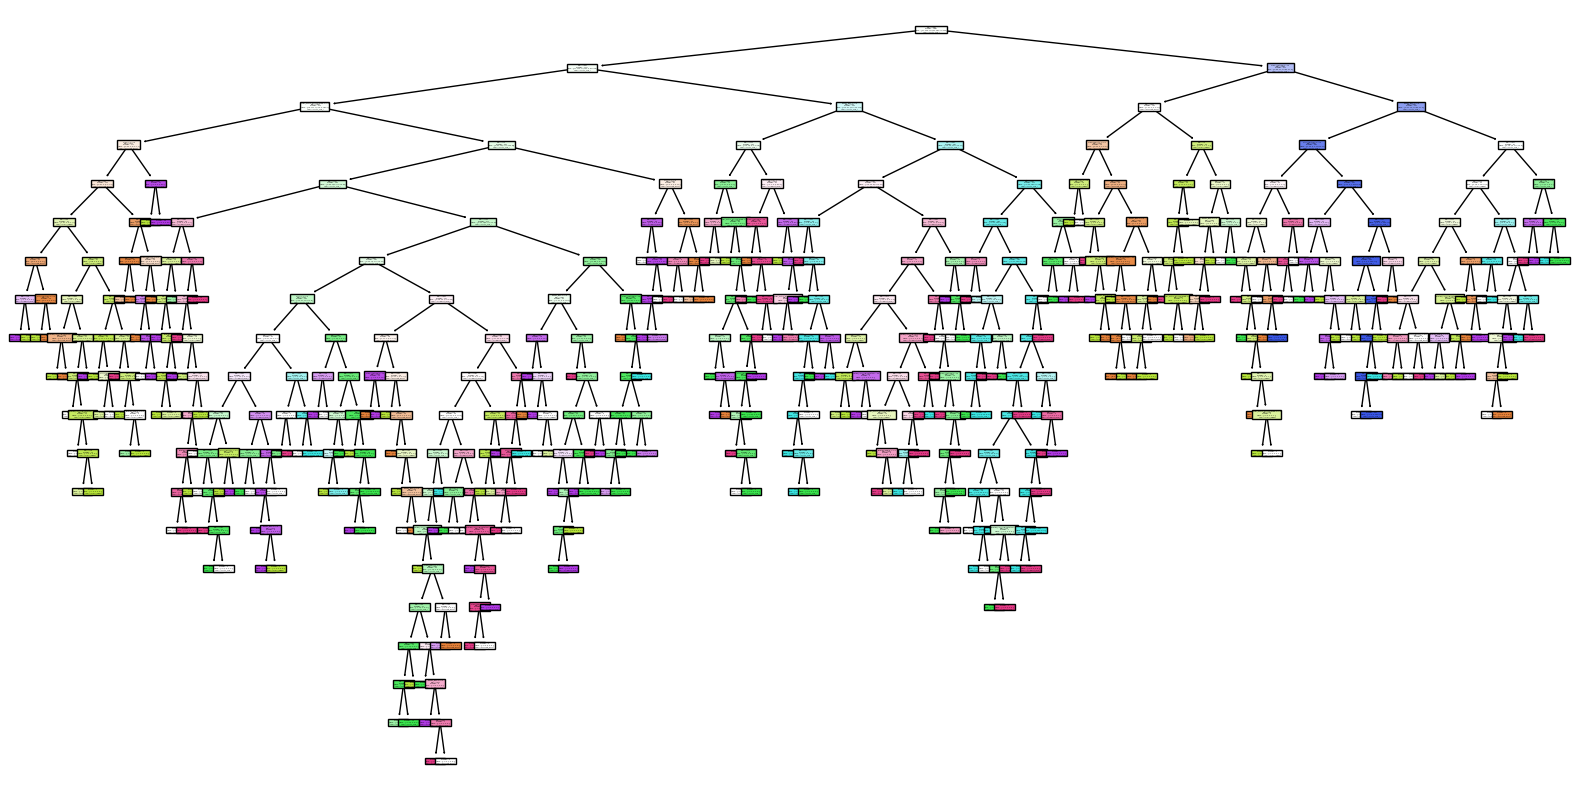

In [50]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(modelo_arboles, feature_names=X.columns, class_names=modelo_arboles.classes_, filled=True)
plt.show()


#  Análisis de Importancia de Características

In [51]:
feature_importances = modelo_arboles.feature_importances_
features = X.columns
importances = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importances = importances.sort_values(by='Importance', ascending=False)
print(importances)


                           Feature  Importance
3                             FCVC    0.170361
0                              Age    0.166767
4                              NCP    0.097177
9                              TUE    0.090660
10                     Gender_Male    0.080171
6                             CH2O    0.072226
8                              FAF    0.066435
12                  CAEC_Sometimes    0.048746
15                  CALC_Sometimes    0.044697
2                             FAVC    0.039463
1   family_history_with_overweight    0.034938
16                         CALC_no    0.028416
13                         CAEC_no    0.016576
19    MTRANS_Public_Transportation    0.015744
11                 CAEC_Frequently    0.011249
7                              SCC    0.004548
5                            SMOKE    0.003611
20                  MTRANS_Walking    0.003168
14                 CALC_Frequently    0.003069
17                     MTRANS_Bike    0.001977
18           